In [1]:
print("https://www.kaggle.com/uciml/pima-indians-diabetes-database")

https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,  roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from IPython.display import Image

In [3]:
# 데이터 불러오기
diabetes_df = pd.read_csv('C:/Yujin/lecture_docs/강의교안/05_머신러닝/diabetes.csv')
# diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#데이터 정보
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#행과 열의 갯수
diabetes_df.shape

(768, 9)

In [6]:
#마지막 열 
diabetes_df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
#마지막 열의 unique값
diabetes_df.Outcome.unique()

array([1, 0], dtype=int64)

In [8]:
#찾으려는 환자가 268명
diabetes_df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
#각 열의 데이터 타입
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Gluose열의 값들을 하나의 리스트 안에 배열
diabetes_df.Glucose.values

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
       147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
       111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
        88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
        99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
       131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
       123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
        85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,
        78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105,
       173, 122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108,
       108, 154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,
        99, 109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110,
       111, 102, 134,  87,  79,  75, 179,  85, 129, 143, 130,  8

In [11]:
# Glucose 값이 0인지 알아보기. Boolean(True/False) 
diabetes_df.Glucose == 0

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [12]:
# Glucose 값이 0인 행만 보기
diabetes_df[diabetes_df.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
# Glucose 값이 0인 행 갯수 찾기
# ① len
len(diabetes_df[diabetes_df.Glucose == 0])

5

In [14]:
# ② .count 
diabetes_df[diabetes_df.Glucose == 0]['Glucose'].count()

5

In [15]:
# ③ .groupby
# diabetes_df.groupby("Glucose").count()
diabetes_df.groupby("Glucose").Outcome.count()   # 0인 환자 5명, 44인 환자 1명...

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Outcome, Length: 136, dtype: int64

In [16]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    count = len(diabetes_df[diabetes_df[feature] == 0])
    ratio = count/len(diabetes_df)
    print(feature, '\t','오류데이터 개수: ', count, '\t','오류데이터 비율: {:.2f}%'.format(ratio))

Glucose 	 오류데이터 개수:  5 	 오류데이터 비율: 0.01%
BloodPressure 	 오류데이터 개수:  35 	 오류데이터 비율: 0.05%
SkinThickness 	 오류데이터 개수:  227 	 오류데이터 비율: 0.30%
Insulin 	 오류데이터 개수:  374 	 오류데이터 비율: 0.49%
BMI 	 오류데이터 개수:  11 	 오류데이터 비율: 0.01%


In [17]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_df['Glucose'].replace(0, diabetes_df['Glucose'].mean())

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [18]:
# min값의 0이 제거 
for feature in zero_features:
    diabetes_df[feature] = diabetes_df[feature].replace(0, diabetes_df[feature].mean())
diabetes_df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 데이터 전처리 시 sklearn에서 제공하는  스케일러
변수들의 단위 차이로 스케일이 크게 달라지거나, 데이터셋의 값들이 지나치게 들쑥날쑥한 경우 데이터 스케일링을 조정  

1. StandardScaler  
2. MinMaxScaler  
3. RobustScaler  
4. Normalizer   

In [19]:
# StandardScaler 클래스를 이용해 feature 데이터 세트에 일괄적으로 스케일링 적용
X = diabetes_df.drop(['Outcome'], axis=1).to_numpy() #.to_numpy 함수를 이용해 ndarray 형태로 변환
y = diabetes_df.Outcome.to_numpy()

# 데이터 분할, train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# StandardScaler 각 feature의 평균을 0, 분산을 1로 변경. 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

## 로지스틱 회귀분석 - 훈련, 예측, 평가수행

In [20]:
# 로지스틱 회귀
reg = LogisticRegression()

# 훈련
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

# 실제
print(y_test[:20])
print('----------------------------------------------------------------')

# 예측
print(y_pred[:20]) 
print('----------------------------------------------------------------')

# 예측률
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba[:10])

[0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
----------------------------------------------------------------
[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
----------------------------------------------------------------
[[0.96438166 0.03561834]
 [0.79929612 0.20070388]
 [0.84235181 0.15764819]
 [0.43334797 0.56665203]
 [0.58557909 0.41442091]
 [0.24545719 0.75454281]
 [0.16080175 0.83919825]
 [0.84934358 0.15065642]
 [0.80709631 0.19290369]
 [0.89334659 0.10665341]]


## 머신러닝 평가지표
 - ① 혼동행렬 Confusion Matrix
 - ② ROC Curve & AUC
 - ③ 정확도 Accuracy
 - ④ 재현도 Recall
 - ⑤ 정밀도 Precision
 - ⑥ F1 Score

In [21]:
# ① 혼동행렬 Confusion Matrix
# True Positive   False Positive
# False Negative  True Negative

print('혼동행렬 : ', confusion_matrix(y_test, y_pred))

혼동행렬 :  [[90 10]
 [21 33]]


In [22]:
# ② ROC Curve & AUC
# ROC Curve: Receiver Operating Characteristic - 적중확률 대 오경보 확률
# AUC : Area under the Curve - ROC Curve 아래 면적. AUC가 클수록 예측 성능 좋은 모델

print('ROC_AUC 스코어: ', roc_auc_score(y_test, y_pred_proba[:,1])) 

# AUC Score가 84%로 준수한 예측 성능

ROC_AUC 스코어:  0.8433333333333334


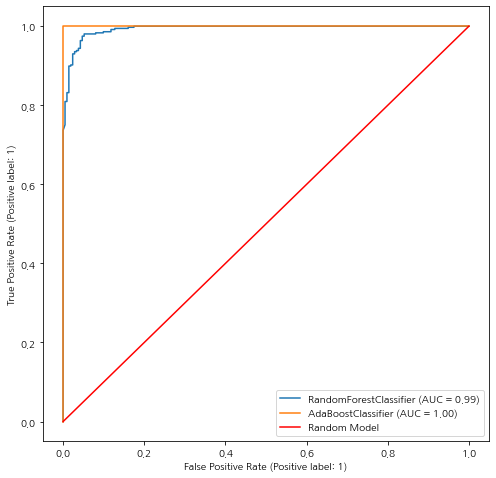

In [23]:
Image('auc.png')

In [24]:
# ③ 정확도 Accuracy
# 모델이 입력된 데이터에 대해 얼마나 정확하게 예측하는가
# (TP + TN) / (TP + TN + FP + FN)

print('정확도: ', accuracy_score(y_test, y_pred))

정확도:  0.7987012987012987


In [25]:
# ④ 재현도 Recall
# 실제값 중에서 모델이 검출한 실제값의 비율
# TP / (TP + FN)

print('재현도: ', recall_score(y_test, y_pred))

재현도:  0.6111111111111112


In [26]:
# ⑤ 정밀도 Precision
# 모델의 예측값이 얼마나 정확하게 예측됐는가
# TP / (TP + FP) 

print('정밀도: ', precision_score(y_test, y_pred))

정밀도:  0.7674418604651163


In [27]:
# ⑥ F1 Score
# 재현도와 정밀도의 성능을 동시에 확인
# 2 * (precision * recall)/ (precision + recall)

print('f1 스코어: ', f1_score(y_test, y_pred))

f1 스코어:  0.6804123711340206


## GridSearchCV
실험 하려는 하이퍼파라미터와 값 범위를 지정하기만 하면 GridSearchCV는 교차 검증을 사용하여 하이퍼파라미터 값의 가능한 모든 조합을 수행.  머신러닝 알고리즘에 사용되는 하이퍼 파라미터를 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려줌. (단, 시간이 오래 걸림) 

  
    
GridSearchCV 생성자 정리
- estimator : classifier, regressor, pipeline 등 가능
- param_grid : 튜닝을 위해 사용될 파라미터를 dictionary 형태로 입력.
- scoring : 예측 성능을 측정할 평가 방법. 보통 accuracy 로 지정하여서 정확도로 성능 평가.
- cv : 폴드 수. 교차 검증에서 몇 개로 분할되는지 지정.
- refit :  default=True, True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습.

### More on Hyperparameters
- Sklearn Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

In [28]:
#GridSearchCV 객체 생성
grid_lr = GridSearchCV(reg, param_grid = {'C':list(np.arange(0.01,10,0.01))}, cv=5, scoring='accuracy')

#'C' : default=1.0, Inverse of regularization strength; 
# must be a positive float. smaller values specify stronger regularization.

#훈련
grid_lr.fit(X_train_scaled, y_train)
best_grid_lr = grid_lr.fit(X_train_scaled, y_train)

#예측값
y_pred = grid_lr.predict(X_test_scaled)

print(y_test[:20]) # 실제
print('----------------------------------------------------------------')
print(y_pred[:20]) # 예측
print('----------------------------------------------------------------')

# .predict_proba : 각 클래스에 대한 확률을 일일히 출력 
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba[:10])


[0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
----------------------------------------------------------------
[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1]
----------------------------------------------------------------
[[0.96438166 0.03561834]
 [0.79929612 0.20070388]
 [0.84235181 0.15764819]
 [0.43334797 0.56665203]
 [0.58557909 0.41442091]
 [0.24545719 0.75454281]
 [0.16080175 0.83919825]
 [0.84934358 0.15065642]
 [0.80709631 0.19290369]
 [0.89334659 0.10665341]]


In [29]:
# GridSearchCV 이후 머신러닝 평가

print('혼동행렬: ', confusion_matrix(y_test, y_pred))
print('ROC_AUC 스코어: ', roc_auc_score(y_test, y_pred_proba[:,1]))
print('정확도: ', accuracy_score(y_test, y_pred))
print('재현도: ', recall_score(y_test, y_pred) )
print('정밀도: ', precision_score(y_test, y_pred))
print('f1 스코어: ',f1_score(y_test, y_pred) )

혼동행렬:  [[89 11]
 [21 33]]
ROC_AUC 스코어:  0.8433333333333334
정확도:  0.7922077922077922
재현도:  0.6111111111111112
정밀도:  0.75
f1 스코어:  0.6734693877551021


In [30]:
grid_lr.best_params_

{'C': 0.21000000000000002}

In [31]:
grid_lr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05,
                               0.060000000000000005, 0.06999999999999999, 0.08,
                               0.09, 0.09999999999999999, 0.11, 0.12, 0.13,
                               0.14, 0.15000000000000002, 0.16, 0.17,
                               0.18000000000000002, 0.19, 0.2,
                               0.21000000000000002, 0.22, 0.23,
                               0.24000000000000002, 0.25, 0.26, 0.27, 0.28,
                               0.29000000000000004, 0.3, ...]},
             scoring='accuracy')